## Import necessary libraries

In [2]:

import numpy as np
import tensorflow as tf
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


Matplotlib is building the font cache; this may take a moment.


## Generate random data

In [3]:

np.random.seed(0)
X = np.random.rand(100, 1) * 10
y = 2 * X + 1 + np.random.randn(100, 1)


In [4]:

# Convert data to TensorFlow tensors
X_tf = tf.constant(X, dtype=tf.float32)
y_tf = tf.constant(y, dtype=tf.float32)


In [5]:

# Convert data to PyTorch tensors
X_pt = torch.tensor(X, dtype=torch.float32)
y_pt = torch.tensor(y, dtype=torch.float32)


## Define and build the models

In [6]:

# TensorFlow model
model_tf = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])


c:\Users\New User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:

# PyTorch model
class ModelPT(nn.Module):
    def __init__(self):
        super(ModelPT, self).__init__()
        self.fc1 = nn.Linear(1, 10)
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model_pt = ModelPT()


## Define Loss Function, Optimizer, and Metric

In [8]:

# Loss function, optimizer for TensorFlow
loss_fn_tf = tf.keras.losses.MeanSquaredError()
optimizer_tf = tf.keras.optimizers.SGD(learning_rate=0.001)


In [9]:

# Loss function, optimizer for PyTorch
loss_fn_pt = nn.MSELoss()
optimizer_pt = optim.SGD(model_pt.parameters(), lr=0.001)


## Train the models

In [10]:

# TensorFlow training loop
for epoch in range(100):
    with tf.GradientTape() as tape:
        predictions_tf = model_tf(X_tf)
        loss_tf = loss_fn_tf(y_tf, predictions_tf)
    gradients_tf = tape.gradient(loss_tf, model_tf.trainable_variables)
    optimizer_tf.apply_gradients(zip(gradients_tf, model_tf.trainable_variables))


In [11]:

# PyTorch training loop
for epoch in range(100):
    predictions_pt = model_pt(X_pt)
    loss_pt = loss_fn_pt(predictions_pt, y_pt)
    optimizer_pt.zero_grad()
    loss_pt.backward()
    optimizer_pt.step()


## Plot the results

4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step


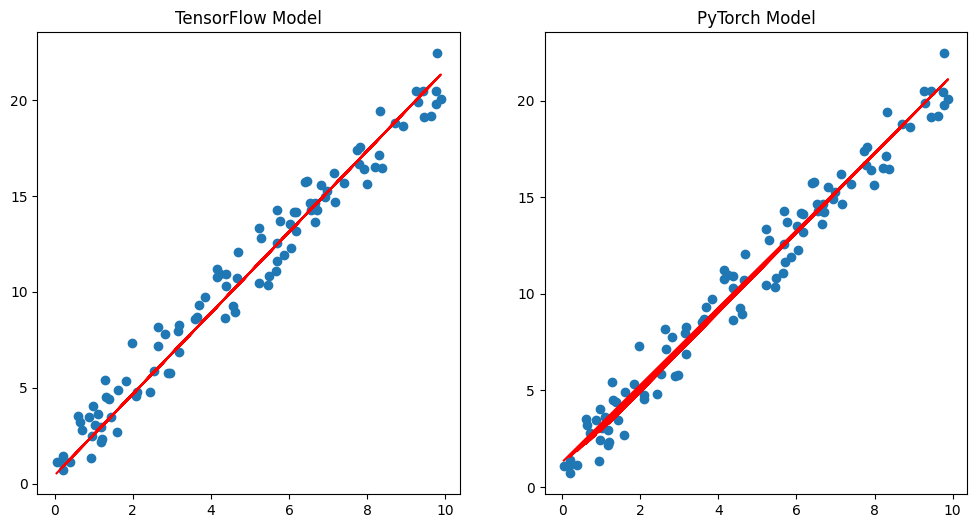

In [12]:

plt.figure(figsize=(12, 6))

# TensorFlow plot
plt.subplot(1, 2, 1)
plt.scatter(X, y)
plt.plot(X, model_tf.predict(X_tf), color='red')
plt.title('TensorFlow Model')

# PyTorch plot
plt.subplot(1, 2, 2)
plt.scatter(X, y)
plt.plot(X, model_pt(X_pt).detach().numpy(), color='red')
plt.title('PyTorch Model')

plt.show()


## Evaluate the models

In [13]:

# TensorFlow evaluation
accuracy_tf = 1 - (loss_tf / tf.reduce_mean(tf.square(y_tf - tf.reduce_mean(y_tf))))
print("Accuracy (TensorFlow):", accuracy_tf.numpy())


Accuracy (TensorFlow): 0.96597356


In [14]:

# PyTorch evaluation
accuracy_pt = 1 - (loss_pt / torch.mean(torch.square(y_pt - torch.mean(y_pt))))
print("Accuracy (PyTorch):", accuracy_pt.item())


Accuracy (PyTorch): 0.9696013331413269
